### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


### 1.7

Let's define the $x_{+}$ and $x_{-}$ functions

In [2]:
def x_plus(p_val, q_val):
    '''insert computation'''
    result = -p_val + np.sqrt(p_val**2 + q_val)
    return result
    
def x_minus(p_val, q_val):
    '''insert computation'''
    result = -p_val - np.sqrt(p_val**2 + q_val)
    return result


#### a)

Similarly for $R_{+}$ and $R_{-}$

In [3]:
def R_plus_p(p_val, delta_p, q_val):
    return ((x_plus(p_val+delta_p,q_val)-x_plus(p_val,q_val))/x_plus(p_val,q_val)) / (delta_p/p_val)

def R_minus_p(p_val, delta_p, q_val):
    return ((x_minus(p_val+delta_p,q_val)-x_minus(p_val,q_val))/x_minus(p_val,q_val)) / (delta_p/p_val)


Now let's calculate the $R_{+}$ and $R_{-}$ values for q=1

In [4]:
del_p = 1e-3
q = 1

for p in [-1, 1]:
    print(f'R_plus for p={p}, q={q}: {R_plus_p(p, del_p, q)}')
    print(f'R_minus for p={p}, q={q}: {R_minus_p(p, del_p, q)}')


R_plus for p=-1, q=1: 0.7070335212563417
R_minus for p=-1, q=1: -0.7075337713501161
R_plus for p=1, q=1: -0.7066802177995782
R_minus for p=1, q=1: 0.7071799678933286


#### b)

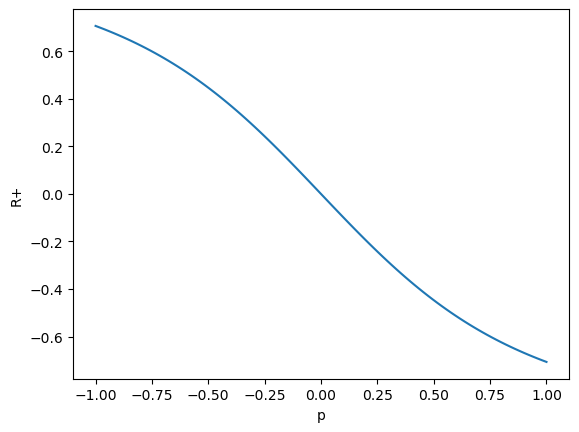

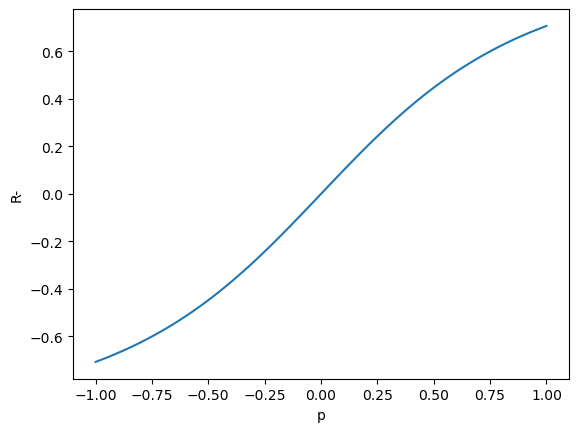

In [5]:
p_vals = np.linspace(-1,1,100)

plt.plot(p_vals, R_plus_p(p_vals, del_p, q))
plt.ylabel('R+')
plt.xlabel('p')
plt.show()

plt.plot(p_vals, R_minus_p(p_vals, del_p, q))
plt.ylabel('R-')
plt.xlabel('p')
plt.show()


#### c)

In [6]:
def R_plus_q(q_val, delta_q, p_val):
    return ((x_plus(p_val,q_val+delta_q)-x_plus(p_val,q_val))/x_plus(p_val,q_val)) / (delta_q/q_val)

def R_minus_q(q_val, delta_q, p_val):
    return ((x_minus(p_val,q_val+delta_q)-x_minus(p_val,q_val))/x_minus(p_val,q_val)) / (delta_q/q_val)


In [7]:
del_q = 1e-3
p = 1

for q in [-1, 1]:
    print(f'R_plus for p={p}, q={q}: {R_plus_q(q, del_q, p)}')
    print(f'R_minus for p={p}, q={q}: {R_minus_q(q, del_q, p)}')
    

R_plus for p=1, q=-1: 31.62277660168378
R_minus for p=1, q=-1: -31.62277660168389
R_plus for p=1, q=1: 0.8534467230844732
R_minus for p=1, q=1: 0.1464283081556372


#### d)

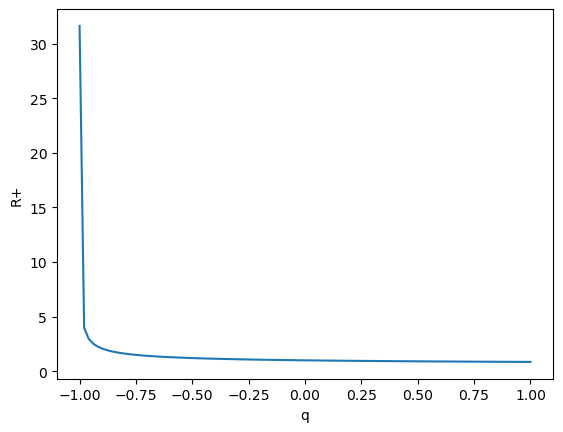

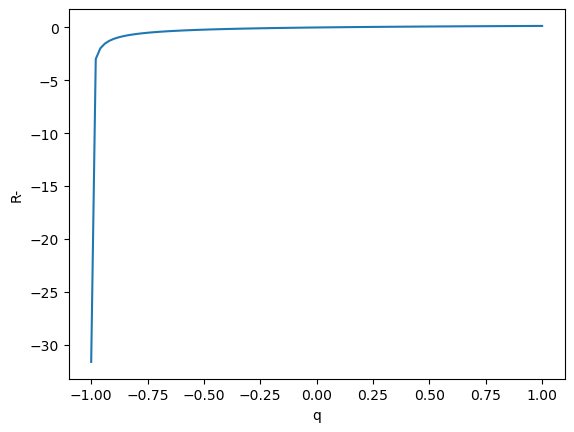

In [8]:
q_vals = np.linspace(-1,1,100)

plt.plot(p_vals, R_plus_q(q_vals, del_q, p))
plt.ylabel('R+')
plt.xlabel('q')
plt.show()

plt.plot(p_vals, R_minus_q(q_vals, del_q, p))
plt.ylabel('R-')
plt.xlabel('q')
plt.show()


### 1.8

#### a)

Let's define the linear_interpolate function

In [9]:
def linear_interpolate(f, x_0, x_1, x):
    gradient = (f(x_1)-f(x_0))/(x_1-x_0)
    result = f(x_0) + gradient*(x-x_0)
    return result


Let's evaluate the linear interpolant of $2sin2x$ with nodes at 0 and 1 at 0.75:

In [36]:
def f_x(x):
    return 2*np.sin(2*x)

print(f'linear interpolant at 0.75: {linear_interpolate(f_x, 0, 1, 0.75)}')


linear interpolant at 0.75: 1.3639461402385225


#### b)

Let's plot sinx in this interval along with its interpolant for reference

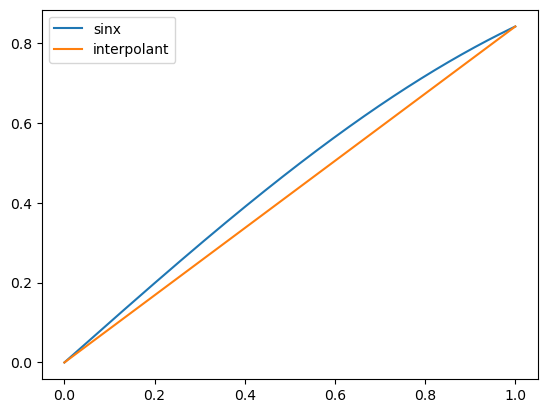

In [41]:
x_vals = np.linspace(0,1,1000)

plt.plot(x_vals, np.sin(x_vals), label='sinx')
plt.plot(x_vals, linear_interpolate(np.sin, 0, 1, x_vals), label='interpolant')
plt.legend()
plt.show()


We can see that for this function, the linear interpolant is a pretty good approximation.

#### c)

In [12]:
def interpolation_error(f, x_0, x_1, x):
    result = f(x) - linear_interpolate(f, x_0, x_1, x)
    return result


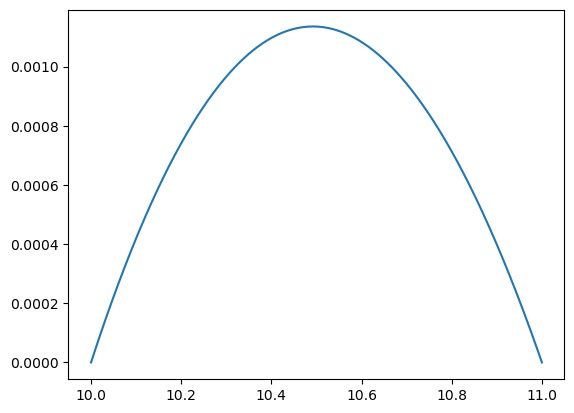

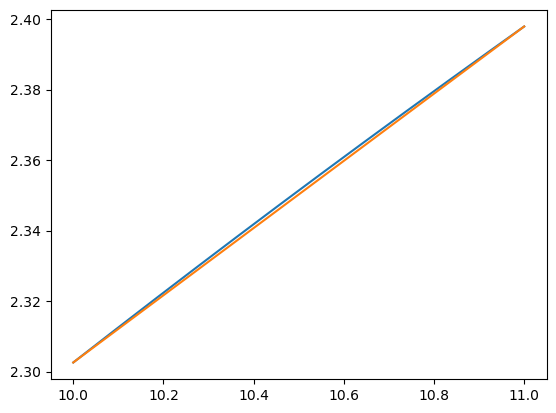

error at x=10.2: 0.0007405913353144555
error at x=10.8: 0.0007128972926682131


In [13]:
x_0 = 10
x_1 = 11

x_vals = np.linspace(x_0,x_1,1000)

def f_x(x):
    return np.log(x)

plt.plot(x_vals, interpolation_error(f_x, x_0, x_1, x_vals))
plt.show()

plt.plot(x_vals, f_x(x_vals))
plt.plot(x_vals, linear_interpolate(f_x,x_0,x_1,x_vals))
plt.show()

print(f'error at x=10.2: {interpolation_error(f_x, x_0, x_1, 10.2)}')
print(f'error at x=10.8: {interpolation_error(f_x, x_0, x_1, 10.8)}')


#### d)

In [14]:
def max_error(f, x_0 , x_1):
    
    x_vals = np.linspace(x_0,x_1,1000)
    result = [max(interpolation_error(f, x_0, x_1, x) for x in x_vals)]
    return result[0]


In [30]:
def f_x(x):
    return 1/(1+x**2)

h=10.25

print(f'Max error for 1/(1+x^2): {max_error(f_x,0,h)}')


Max error for 1/(1+x^2): 0.002332900598825405


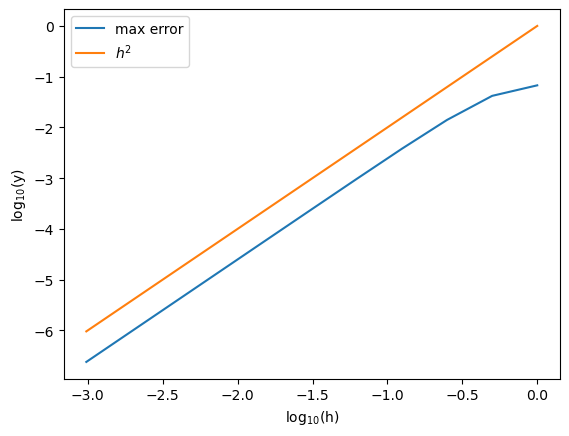

In [18]:
h_vals = np.array([2**-k for k in range(11)])
h_vals

# I have used base 10 for the log-log plot
plt.plot(np.log10(h_vals), np.log10([max_error(f_x, 0, h) for h in h_vals]), label='max error')
plt.plot(np.log10(h_vals), np.log10(h_vals**2), label='$h^2$')
plt.xlabel('log$_{10}$(h)')
plt.ylabel('log$_{10}$(y)')
plt.legend()
plt.show()


A $\gamma$ of 2 implies that the max error is proportional to the square of the 

### 1.9

#### a)

In [19]:
def lagrange(k, x, nodes):
    
    L_x = 1
    for j in range(len(nodes)):
        if j != k:
            L_x *= (x-nodes[j])/(nodes[k]-nodes[j])

    return L_x

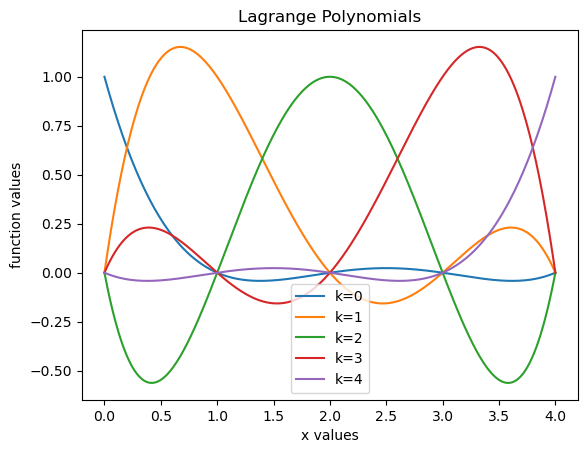

In [20]:
nodes = [0,1,2,3,4]
x_vals = np.linspace(0,4,400)

for i in nodes:
    plt.plot(x_vals, lagrange(i, x_vals, nodes), label=f'k={i}')

plt.xlabel('x values')
plt.ylabel('function values')
plt.title('Lagrange Polynomials')
plt.legend()
plt.show()

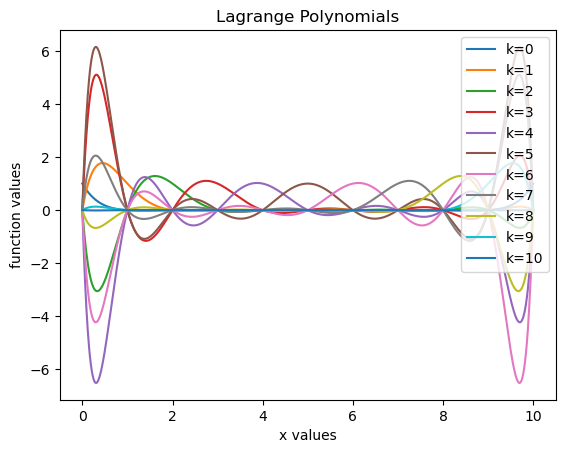

In [21]:
nodes = np.arange(11)
x_vals = np.linspace(0,10,1000)

for i in nodes:
    plt.plot(x_vals, lagrange(i, x_vals, nodes), label=f'k={i}')

plt.xlabel('x values')
plt.ylabel('function values')
plt.title('Lagrange Polynomials')
plt.legend()
plt.show()

#### b)

In [22]:
def lagrange_interp(x, nodes, values):
    
    p_x = 0
    for k in range(len(nodes)):
        p_x += values[k]*lagrange(k,x,nodes)
    return p_x

def f_x(x):
    return 1/(1+x**2)


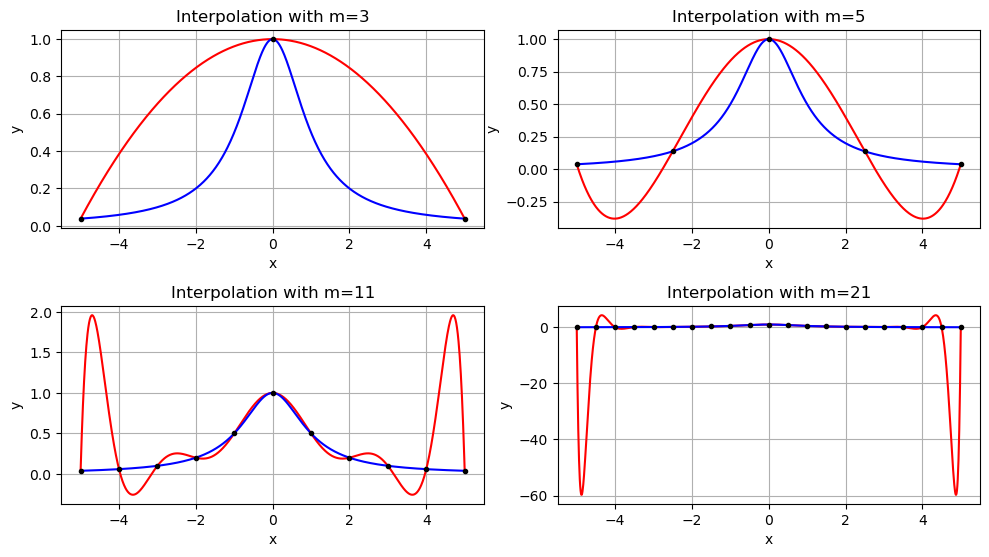

In [23]:
m_vals = [3,5,11,21]
x_vals = np.linspace(-5,5,1000)
f_vals = f_x(x_vals)

plt.figure(figsize=(10, 8))

for i, m in enumerate(m_vals):
    nodes = np.linspace(-5, 5, m)
    vals = f_x(nodes)

    plt.subplot(3, 2, i + 1)
    plt.plot(x_vals, lagrange_interp(x_vals, nodes, vals), color='red')
    plt.plot(x_vals, f_vals, color='blue')
    plt.plot(nodes, vals, '.', color='black')
    
    plt.title(f'Interpolation with m={m}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

It seems that greater values of m lead to greater accuracy for the main section of the polynomial as it passes through more points. However, this also results in greater divergence at the endpoints. This is very evident for the m=21 polynomial which is pretty accurate from -4<x<4 but blows out of proportion at the ends of the x-interval.

This is probably because these higher, more accurate polynomials have much greater coefficients of x, which causes extreme oscillations as |x| increases. This is known as Runge's phenomenon.

In [24]:
x_1={}
x_2={}

for m in m_vals:
    nodes = np.linspace(-5,5,m)
    vals = f_x(nodes)
    x_1[m] = lagrange_interp(1, nodes, vals)
    x_2[m] = lagrange_interp(4.5, nodes, vals)

df_1 = pd.DataFrame({'1':x_1})
df_2 = pd.DataFrame({'4.5': x_2})

combined = pd.concat([df_1, df_2], axis=1)

combined.loc['actual'] = [f_x(1), f_x(4.5)]

display(combined)

,1,4.5
3,0.961538,0.221154
5,0.834218,-0.289125
11,0.500000,1.578721
21,0.500000,0.047059
actual,0.500000,0.047059


For x=1, the values of the polynomial consistently get better as m increases, until they are exactly right for m=11 and m=21 (since 1 is a node here). However for x=4.5, we notice that the values actually get worse as m increases until we have 4.5 as a node for m=21. This illustrates how, for big m, a Lagrange polynomial oscillates more and more near the endpoints of a region.

Weierstrass's theoremn states that for f continuous on [a,b], there exists an arbitrarily close polynomial approximation such that |f(x)-p(x)|<ε for all x∈[a,b]

